<a href="https://colab.research.google.com/github/coddingyun/pytorch/blob/main/Bookstudy_ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 선형 회귀
: 학습 데이터와 가장 잘 맞는 하나의 직선을 찾는 일 (y=Wx+b, H(x)=Wx+b)

W: 가중치(Weight)

b: 편향(bias)


- 비용함수(Cost function)

= 손실함수 = 오차함수 = 목적함수

오차가 가장 작은 직선을 찾는다 -> Cost(W,b)를 최소가 되게 만드는 W와 b 구하기

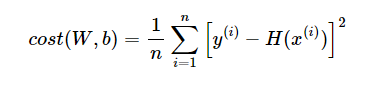



- 옵티마이저 - 경사하강법(Gradient Descent)
: 최적화 알고리즘, 비용이 최소화되는 방향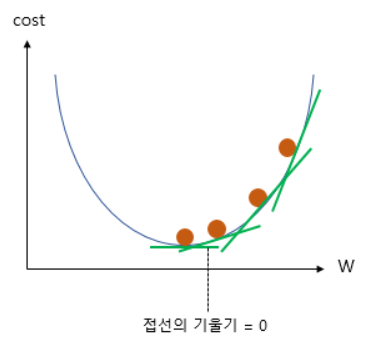

적당한 learning rate 찾는 것도 중요





##파이토치로 선형 회귀 구현하기

In [ ]:
#1. 기본셋팅
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1) # 재실행시에도 같은 결과가 나오도록 random seed를 준다.

In [ ]:
#2. 변수선언
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

print(x_train)
print(x_train.shape)
print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])
tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


In [ ]:
#3. 가중치와 편향의 초기화
# W와 b를 0으로 초기화, 학습을 통해 값이 변경되는 변수임을 명시
W = torch.zeros(1, requires_grad=True)
print(W)

b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)
tensor([0.], requires_grad=True)


In [ ]:
#4. 가설 세우기
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [ ]:
#5. 비용 함수 선언하기
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


In [ ]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1999 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad() # 파이토치는 미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적시키는 특징이 있어서
    cost.backward() # 비용함수를 미분하여 gradient 계산
    optimizer.step() # W와 b 업데이트

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1999 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1999 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1999 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1999 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1999 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1999 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1999 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1999 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1999 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1999 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1999 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/1999 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/1999 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/1999 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/1999 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/1999 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/1999 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/1999 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/1999 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/1999 W: 1.997, b: 0.008 Cost: 0.000008

# 2. 자동 미분

In [ ]:
# 2w^2 + 5 미분하기
import torch
w=torch.tensor(2.0, requires_grad=True) # 값이 2인 임의의 스칼라 텐서 저장,기울기 저장
y=w**2
z=2*y+5
z.backward() # 미분
print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 8.0


# 3. 다중 선형 회귀

다수의 x로부터 y 예측

H(x)=w1x1+w2x2+w3x3+b

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

In [ ]:
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [ ]:
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
#H(x)=w1x1+w2x2+w3x3+b

In [ ]:
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)
nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b
    cost = torch.mean((hypothesis - y_train) ** 2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/1000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563628
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497595
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435044
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375726
Epoch  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319507
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215703
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167810
Epoch  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079390


##벡터와 행렬연산으로 바꾸기

x의 개수가 많을 경우, 일일히 선언해주기 어려움. 

행렬 곱셈 연산/ 벡터 내적 사용

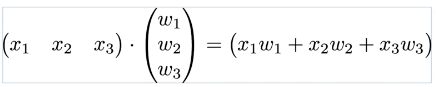

H(x) = XW + B


In [ ]:
x_train = torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])
y_train = torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

W = torch.zeros((3,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):
  hypothesis = x_train.matmul(W) + b
  cost = torch.mean((hypothesis - y_train)**2)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/20 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7861,  95.8280]) Cost: 3069.590820
Epoch    3/20 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670288
Epoch    4/20 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.481964
Epoch    5/20 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/20 hypothesis: tensor([148.9423, 178.9731, 169.8976, 192.0301, 136.5279]) Cost: 38.687401
Epoch    7/20 hypothesis: tensor([151.1574, 181.6347, 172.4254, 194.8856, 138.5585]) Cost: 16.499046
Epoch    8/20 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5042, 139.7097]) Cost: 9.365656
Epoch    9/20 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4216, 140.3625]) Cost: 7.071105
Epoch   10/20 hyp

.requires_grad를 True로 설정할 경우 이와 관련한 모든 연산들을 추적한다. 모든 연산이 끝나면, .backward()를 호출하여 모든 계산된 gradients 한마디로 한 tensor에 대해 그와 관련한 gradient를 자동으로 계산한다.

 

tensor 연산의 history가 추적되는 것을 멈추려면, .detach() method를 호출한다. 이를 통해 tensor를 history에 대한 연산에서 떨어뜨려, 추적된 것들에 대한 앞으로의 연산을 막을 수 있다.



# 4. nn.Module로 구현하는 선형 회귀

##단순 선형 회귀 구현하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

In [ ]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

model = nn.Linear(1,1) # 입력차원, 출력차원
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
nb_epochs =2000
for epoch in range(nb_epochs+1):
  prediction = model(x_train)
  cost = F.mse_loss(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch %100:
     print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    1/2000 Cost: 10.358571
Epoch    2/2000 Cost: 8.188817
Epoch    3/2000 Cost: 6.473738
Epoch    4/2000 Cost: 5.118055
Epoch    5/2000 Cost: 4.046456
Epoch    6/2000 Cost: 3.199410
Epoch    7/2000 Cost: 2.529861
Epoch    8/2000 Cost: 2.000614
Epoch    9/2000 Cost: 1.582268
Epoch   10/2000 Cost: 1.251583
Epoch   11/2000 Cost: 0.990191
Epoch   12/2000 Cost: 0.783570
Epoch   13/2000 Cost: 0.620243
Epoch   14/2000 Cost: 0.491138
Epoch   15/2000 Cost: 0.389082
Epoch   16/2000 Cost: 0.308409
Epoch   17/2000 Cost: 0.244637
Epoch   18/2000 Cost: 0.194224
Epoch   19/2000 Cost: 0.154372
Epoch   20/2000 Cost: 0.122867
Epoch   21/2000 Cost: 0.097959
Epoch   22/2000 Cost: 0.078267
Epoch   23/2000 Cost: 0.062698
Epoch   24/2000 Cost: 0.050387
Epoch   25/2000 Cost: 0.040652
Epoch   26/2000 Cost: 0.032953
Epoch   27/2000 Cost: 0.026864
Epoch   28/2000 Cost: 0.022046
Epoch   29/2000 Cost: 0.018234
Epoch   30/2000 Cost: 0.015217
Epoch   31/2000 Cost: 0.012829
Epoch   32/2000 Cost: 0.010937
Epoch  

In [ ]:
new_var = torch.FloatTensor([[4.0]])
pred_y = model(new_var)
print("훈련 후 입력이 4일 때의 예측 값 : ",pred_y)

훈련 후 입력이 4일 때의 예측 값 :  tensor([[7.9989]], grad_fn=<AddmmBackward>)


In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


##다중 선형 회귀 구현하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

In [ ]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [ ]:
model = nn.Linear(3,1)
print(list(model.parameters())) #랜덤 초기화되어있다.

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) #0.01은 발산
nb_epochs = 2000
for epoch in range(nb_epochs+1):
  prediction = model(x_train)
  cost=F.mse_loss(prediction, y_train)
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 ==0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 31667.599609
Epoch  100/2000 Cost: 0.225988
Epoch  200/2000 Cost: 0.223909
Epoch  300/2000 Cost: 0.221935
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218270
Epoch  600/2000 Cost: 0.216571
Epoch  700/2000 Cost: 0.214954
Epoch  800/2000 Cost: 0.213418
Epoch  900/2000 Cost: 0.211954
Epoch 1000/2000 Cost: 0.210558
Epoch 1100/2000 Cost: 0.209230
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206767
Epoch 1400/2000 Cost: 0.205618
Epoch 1500/2000 Cost: 0.204524
Epoch 1600/2000 Cost: 0.203484
Epoch 1700/2000 Cost: 0.202488
Epoch 1800/2000 Cost: 0.201542
Epoch 1900/2000 Cost: 0.200637
Epoch 2000/2000 Cost: 0.199772


In [ ]:
new_var = torch.FloatTensor([[73,80,75]])
pred_y=model(new_var)
print("훈련 후 입력이 73, 80, 75 일때의 예측 값: ", pred_y)

훈련 후 입력이 73, 80, 75 일때의 예측 값:  tensor([[151.2305]], grad_fn=<AddmmBackward>)


In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.9778, 0.4539, 0.5768]], requires_grad=True), Parameter containing:
tensor([0.2802], requires_grad=True)]


# 5. 클래스로 파이토치 모델 구현하기

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__() #super: nn,Module의 속성을 가지고 초기화
    self.linear = nn.Linear(1,1)

  def forward(self, x): #forward연산 수행 / x로부터 예측된 y 얻는 것
    return self.linear(x)

model = LinearRegressionModel()

In [ ]:
class MultivariateLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3,1)
  def forward(self, x):
    return self.linear(x)
  
model = MultivariateLinearRegressionModel()

##단순 선형 회귀 클래스로 구현하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

In [ ]:
x_train=torch.FloatTensor([[1], [2], [3]])
y_train=torch.FloatTensor([[2], [4], [6]])

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1,1)

  def forward(self, x):
    return self.linear(x)
model = LinearRegressionModel()

optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

nb_epochs = 2000
for epoch in range(nb_epochs+1):
  prediction = model(x_train)
  cost = F.mse_loss(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


##다중 선형 회귀 클래스로 구현하기

In [ ]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

class MultivariateLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3,1)
  def forward(self, x):
    return self.linear(x)
model = MultivariateLinearRegressionModel()

optimizer = torch.optim.SGD(model.parameters(),lr=1e-5)

nb_epochs = 2000
for epoch in range(nb_epochs+1):
  prediction = model(x_train)
  cost = F.mse_loss(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 42134.707031
Epoch  100/2000 Cost: 5.960053
Epoch  200/2000 Cost: 5.654689
Epoch  300/2000 Cost: 5.365413
Epoch  400/2000 Cost: 5.091413
Epoch  500/2000 Cost: 4.831831
Epoch  600/2000 Cost: 4.585963
Epoch  700/2000 Cost: 4.353061
Epoch  800/2000 Cost: 4.132451
Epoch  900/2000 Cost: 3.923452
Epoch 1000/2000 Cost: 3.725488
Epoch 1100/2000 Cost: 3.537961
Epoch 1200/2000 Cost: 3.360339
Epoch 1300/2000 Cost: 3.192085
Epoch 1400/2000 Cost: 3.032697
Epoch 1500/2000 Cost: 2.881700
Epoch 1600/2000 Cost: 2.738672
Epoch 1700/2000 Cost: 2.603207
Epoch 1800/2000 Cost: 2.474846
Epoch 1900/2000 Cost: 2.353291
Epoch 2000/2000 Cost: 2.238137


# 6. 미니 배치와 데이터 로드(Mini Batch and Data Load)

##미니 배치와 배치 크기

- 많은 데이터를 사용할 경우, 오래 걸리는 것을 방지 하기 위해서 미니 배치 단위로 나누어 경사하강법을 수행한다.

- 전체 데이터에 대한 학습이 1회 끝나면 1에포크가 끝나게 된다.

- 배치 크기는 보통 2의 제곱수를 사용한다.

## 이러테이션(Iteration)
: 한번의 에포크에서 이루어지는 W와 b의 업데이트 횟수

- 데이터:2000, 배치 크기:200 이면 이터레이션 수는 10

##데이터 로드하기(Data Load)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset # 텐서 데이터셋 : 텐서를 입력받아 데이터섹의 형태로 변환
from torch.utils.data import DataLoader # 데이터 로더

In [ ]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

dataset = TensorDataset(x_train, y_train) # 이제 데이터 로더 사용가능
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(),lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    #print(batch_idx)
    #print(samples)
    x_train, y_train = samples
    prediction = model(x_train)
    cost = F.mse_loss(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 26838.554688
Epoch    0/20 Batch 2/3 Cost: 4949.356934
Epoch    0/20 Batch 3/3 Cost: 1217.417969
Epoch    1/20 Batch 1/3 Cost: 874.722717
Epoch    1/20 Batch 2/3 Cost: 256.657043
Epoch    1/20 Batch 3/3 Cost: 24.682867
Epoch    2/20 Batch 1/3 Cost: 45.678944
Epoch    2/20 Batch 2/3 Cost: 5.590558
Epoch    2/20 Batch 3/3 Cost: 27.639778
Epoch    3/20 Batch 1/3 Cost: 8.685300
Epoch    3/20 Batch 2/3 Cost: 3.939066
Epoch    3/20 Batch 3/3 Cost: 2.802620
Epoch    4/20 Batch 1/3 Cost: 6.150103
Epoch    4/20 Batch 2/3 Cost: 7.124768
Epoch    4/20 Batch 3/3 Cost: 2.149211
Epoch    5/20 Batch 1/3 Cost: 1.789171
Epoch    5/20 Batch 2/3 Cost: 15.624266
Epoch    5/20 Batch 3/3 Cost: 3.540388
Epoch    6/20 Batch 1/3 Cost: 5.700332
Epoch    6/20 Batch 2/3 Cost: 6.880760
Epoch    6/20 Batch 3/3 Cost: 2.429880
Epoch    7/20 Batch 1/3 Cost: 7.628876
Epoch    7/20 Batch 2/3 Cost: 3.857748
Epoch    7/20 Batch 3/3 Cost: 5.840155
Epoch    8/20 Batch 1/3 Cost: 5.205458
Epoch  

In [ ]:
new_var = torch.FloatTensor([[73,80,75]])

pred_y = model(new_var)
print("훈련 후 입력이 73, 80, 75 일때의 예측값 : ", pred_y)

훈련 후 입력이 73, 80, 75 일때의 예측값 :  tensor([[153.5408]], grad_fn=<AddmmBackward>)


# 7. 커스텀 데이터셋(Custom Dataset)

In [ ]:
import torch
import torch.nn.functional as F

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [ ]:
class CustomDataset(Dataset):
  def __init__(self): # 데이터셋의 전처리를 해주는 부분
    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]
  def __len__(self): # 데이터셋의 길이
    return len(self.x_data)
  def __getitem__(self, idx): # 데이터셋에서 특정 1개의 샘플을 가져오는 함수
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

In [ ]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

model = torch.nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs+1):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples
    prediction = model(x_train)
    cost = F.mse_loss(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 54524.218750
Epoch    0/20 Batch 2/3 Cost: 8945.384766
Epoch    0/20 Batch 3/3 Cost: 2403.548828
Epoch    1/20 Batch 1/3 Cost: 1564.037354
Epoch    1/20 Batch 2/3 Cost: 550.309875
Epoch    1/20 Batch 3/3 Cost: 128.874252
Epoch    2/20 Batch 1/3 Cost: 35.747013
Epoch    2/20 Batch 2/3 Cost: 24.368717
Epoch    2/20 Batch 3/3 Cost: 13.028359
Epoch    3/20 Batch 1/3 Cost: 0.577794
Epoch    3/20 Batch 2/3 Cost: 5.028281
Epoch    3/20 Batch 3/3 Cost: 1.949444
Epoch    4/20 Batch 1/3 Cost: 2.790054
Epoch    4/20 Batch 2/3 Cost: 4.539859
Epoch    4/20 Batch 3/3 Cost: 1.471622
Epoch    5/20 Batch 1/3 Cost: 0.735318
Epoch    5/20 Batch 2/3 Cost: 2.351956
Epoch    5/20 Batch 3/3 Cost: 7.989922
Epoch    6/20 Batch 1/3 Cost: 2.292079
Epoch    6/20 Batch 2/3 Cost: 3.429396
Epoch    6/20 Batch 3/3 Cost: 0.660007
Epoch    7/20 Batch 1/3 Cost: 1.045065
Epoch    7/20 Batch 2/3 Cost: 4.478187
Epoch    7/20 Batch 3/3 Cost: 0.089189
Epoch    8/20 Batch 1/3 Cost: 0.152518
Epoch

In [ ]:
new_var = torch.FloatTensor([[73, 80, 75]])
pred_y = model(new_var)
print("훈련 후 입력이 73, 80, 75일 때의 예측값: ", pred_y)

훈련 후 입력이 73, 80, 75일 때의 예측값:  tensor([[152.1972]], grad_fn=<AddmmBackward>)
